<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png"
         width="500" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>
            Chair of Soil Mechanics and Foundation Engineering<br>
            Geotechnical Institute<br>
            Technische Universität Bergakademie Freiberg.
        </p>
        <p>
            <a href="https://tu-freiberg.de/en/soilmechanics">
                https://tu-freiberg.de/en/soilmechanics
            </a>
        </p>
    </div>
</div>

<div style="display: flex; align-items: center;">
    <p style="margin-top: 1em;">
        To activate the <strong>interactive features</strong> when in nbviewer mode, click on &quot;Execute on Binder&quot;
        <img src="https://mybinder.org/static/favicon.ico"
             alt="Binder"
             style="height: 1.1em; vertical-align: middle; margin: 0 6px;">
        on the top right. Then, click on Run → Run All Cells.
    </p>
</div>


# Triaxialversuch

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
from matplotlib import patches

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/Triaxial_plots.ipynb

Folgende Ergebnisse aus drei CU Versuchen seien gegeben.

* Konsolidierungsspannung: $\sigma_\text{c} = \left\{120, 234, 450 \right\}\,$kPa
* Backpressure: $u_0 = 0\,$kPa
* Porenwasserüberdruck im Bruchpunkt: $\Delta u = \left\{90, 154, 297 \right\}\,$kPa
* Axiale Spannungen im Bruchzustand: $\sigma_\text{1f} = \left\{293, 587, 975 \right\}\,$kPa

Anmerkung: wenn hier mit $u_0 > 0$ gerechnet werden sollte, so sind die Sättigungsdrücke zu den obigen Totalspannungsgrößen und den neutralen Spannungen hinzuzuaddieren. In einer Aufgabe wären diese erhöhten Spannungswerte bereits korrekt angegeben.

**Aufgaben:**

* Zeichnen Sie die Mohr'schen Spannungskreise im Bruchzustand und bestimmen Sie graphisch die effektiven Scherfestigkeitsparameter $c'$ und $\varphi'$.
* Bestimmen Sie graphisch die Normal- und Schubspannungen auf der Bruchfläche und sowie deren Orientierung unter Verwendung der Mohr'schen Spannungskreise ab.
* Zeichnen Sie die die totalen und effektiven Spannungspfade im $(\sigma_1-\sigma_3)/2$--$(\sigma_1+\sigma_3)/2$ bzw. $(\sigma_1-\sigma_3)/2$--$(\sigma'_1+\sigma'_3)/2$ Diagramm (verwenden Sie ein und dasselbe Diagramm).
* Leiten Sie auch aus der letzten Darstellung die effektiven Scherfestigkeitsparameter graphisch ab.


## Lösung:

Wir bestimmen zunächst die effektiven Hauptspannungen im Bruchzustand:

\begin{align}
    \sigma_\text{1f}' &= \sigma_\text{1f} - (u_0 + \Delta u)
    \
    \sigma_\text{3f}' &= \sigma_\text{3f} - (u_0 + \Delta u)
\end{align}

In [120]:
#gegebene Größen
s_1f = np.array([293,587,975])
s_3f = np.array([120,234,450])
u_f = np.array([90,154,297])

#back pressure
u_0 = np.array([200,200,200])
s_1f += u_0
s_3f += u_0
u_f += u_0

In [121]:
s_1fe = s_1f - u_f
s_3fe = s_3f - u_f
print('Größte effektive Hauptspannungen beim Bruch in kPa: ', s_1fe)
print('Kleinste effektive Hauptspannungen beim Bruch in kPa: ', s_3fe)

Größte effektive Hauptspannungen beim Bruch in kPa:  [203 433 678]
Kleinste effektive Hauptspannungen beim Bruch in kPa:  [ 30  80 153]


Damit lassen sich die drei Bruchkreise zeichnen.

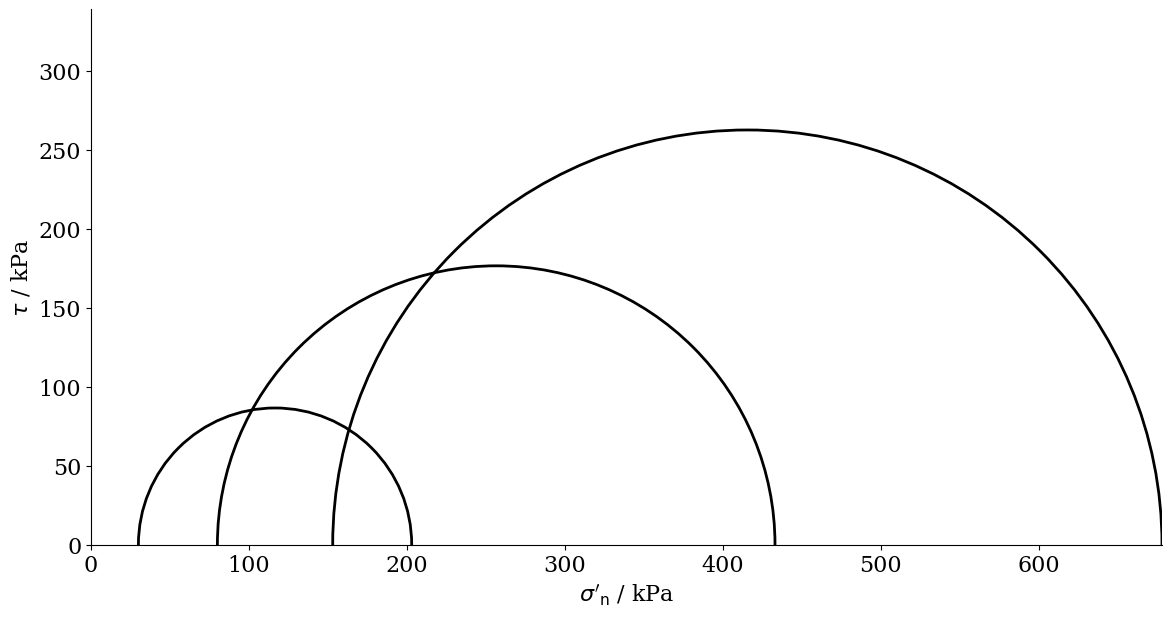

In [122]:
plot_basic_circles(s_1fe,s_3fe)

Wir zeichnen nun eine Gerade, die möglichst gut eine Tangente an die drei Bruchkreise darstellt (eigentlich suchen wir die Einhüllende, die in der Regel gekrümmt ist. Da wir aber für die Mohr-Coulomb'sche Bruchbedingung eine Linearisierung vornehmen, ist die Einhüllende als Gerade festgelegt).

Die Coulomb'sche Bruchbedingung (Gleichung der Grenzgeraden) ist:

$$
    \tau_\text{f} = c' + \sigma_\text{n}' \tan \varphi'
$$

Um den Zusammenhang zu den Bruchhauptspannungen herzustellen schreiben wir die Mohr-Coulomb'sche Bruchbedingung in der Form:

$$
    \sigma_\text{1f}' = \frac{1+\sin\varphi'}{1-\sin\varphi'} \sigma_\text{3f}' + 2c' \frac{\cos \varphi'}{1-\sin\varphi'}
$$

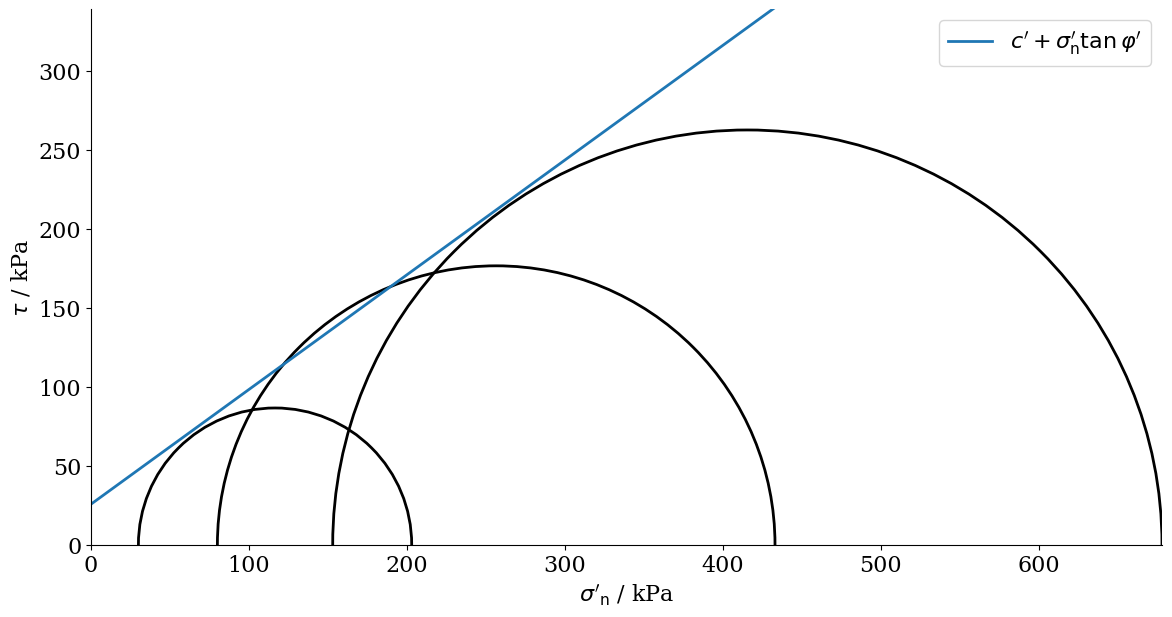

In [123]:
plot_circles_tangent(s_1fe,s_3fe)

Wir sehen, dass die Gerade nur eine Näherung darstellt. Dementsprechend gibt es zeichnerisch einen gewissen Spielraum, der sich in einer Streuung der Ergebnisse von $c'$ und $\varphi'$ niederschlägt. Mathematisch lässt sich mittels des Fehlerquadratminimums eine optimale Ausgleichsgerade finden.

In [124]:
sinphi, c = find_c_sinphi(s_1fe,s_3fe)
print("Die (effektive) Kohäsion beträgt %.1f kPa" %c)
print("Der (effektive) Reibungswinkel beträgt %.1f °" %np.rad2deg(np.arcsin(sinphi)))

Die (effektive) Kohäsion beträgt 25.6 kPa
Der (effektive) Reibungswinkel beträgt 36.0 °


Da die Wirkungsebene von $\sigma_1$ ein horizontaler Schnitt ist, liegt der Pol aller Spannungskreise in $\sigma_3$. Zeichnen wir durch diesen Pol eine Gerade zum Bruchpunkt, so können wir einerseits die in der unter $\vartheta$ zur Horizontalen geneigten Spannungen in der Bruchfläche ablesen, andererseits auch den Winkel $\vartheta$ ablesen, der sich zu

$$
    \vartheta = \frac{\pi}{4} + \frac{\varphi'}{2}
$$

ergibt.

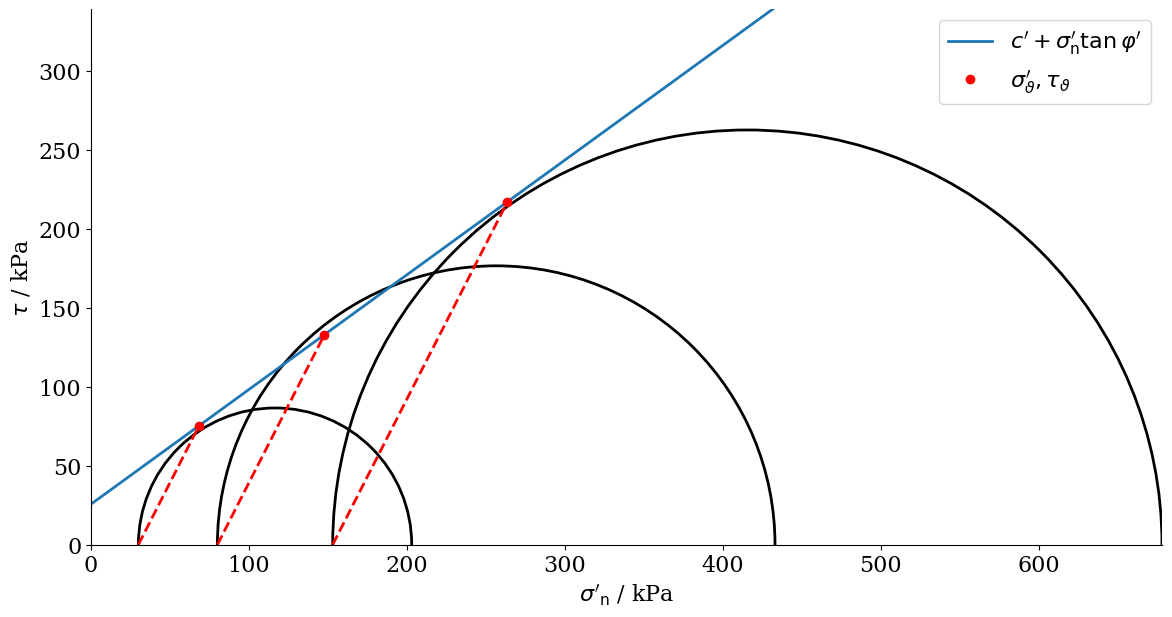

In [125]:
plot_circles_failure(s_1fe,s_3fe)

Es folgt die Darstellung der Spannungspfade. Zunächst werden die Brucheffektivpannungszustände im $(\sigma_1-\sigma_3)/2$--$(\sigma'_1+\sigma'_3)/2$ Diagramm dargestellt. Dazu übertragen wir die Scheitelpunkte der Spannungskreise in die neue Darstellung. Verbindet man die Punkte durch eine Gerade der Gleichung

$$
    \frac{\sigma_1-\sigma_3}{2} = \frac{\sigma'_1+\sigma'_3}{2} \tan \alpha' + b',
$$

so können die Anstiege $m = \tan \alpha'$ und der Ordinatenabschnitt $b'$ ermittelt werden. Durch Vergleich mit der Mohr-Coulomb'schen Bruchbedingung in der Form

$$
    \frac{\sigma_1-\sigma_3}{2} = \frac{\sigma'_1+\sigma'_3}{2} \sin \varphi' + c' \cos \varphi'
$$

ergibt sich die Umrechnung

$$
    \varphi' = \arcsin ( \tan \alpha') \qquad c' = \frac{b'}{\cos \varphi'}
$$

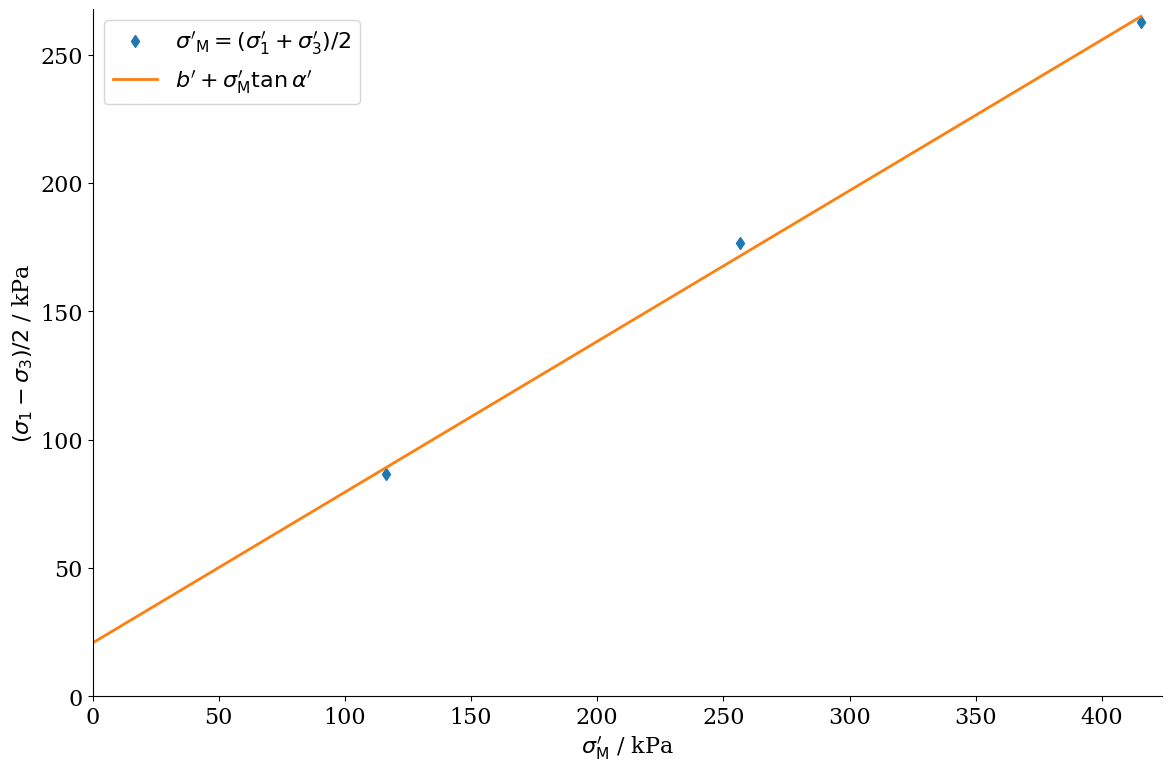

In [126]:
plot_pq(s_1fe,s_3fe)

In [127]:
tanalpha, b = find_b_tanalpha(s_1fe,s_3fe)
print("Der Orinatenabschnitt b' beträgt %.1f kPa" %b)
print("Der Winkel alpha beträgt %.1f °" %np.rad2deg(np.arctan(tanalpha)))

rw = np.arcsin(tanalpha)
print("Die (effektive) Kohäsion beträgt somit %.1f kPa" %(b/np.cos(rw)))
print("Der (effektive) Reibungswinkel beträgt somit %.1f °" %np.rad2deg(np.arcsin(tanalpha)))

Der Orinatenabschnitt b' beträgt 20.7 kPa
Der Winkel alpha beträgt 30.4 °
Die (effektive) Kohäsion beträgt somit 25.6 kPa
Der (effektive) Reibungswinkel beträgt somit 36.0 °


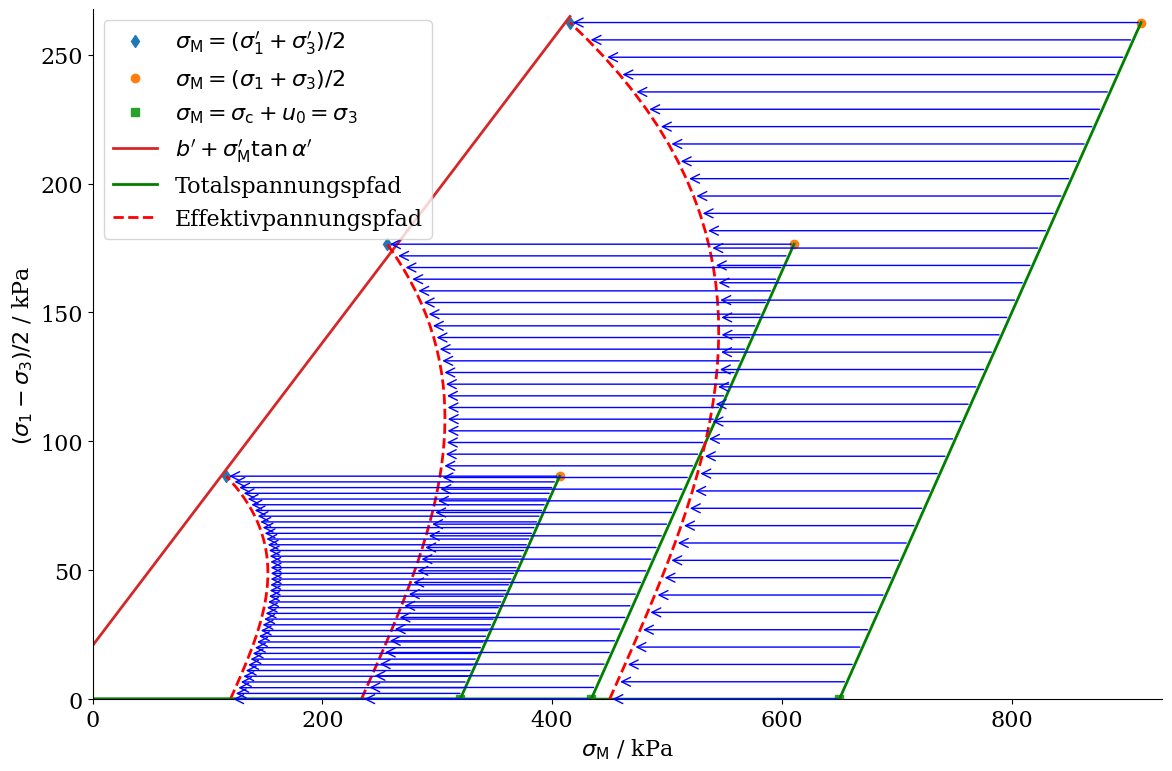

In [128]:
plot_pq_tot(s_1fe,s_3fe,u_f,u_0)

Die totalen und effektiven Spannungspade verlaufen während der Konsolidationsphase entlang der Abszisse (schubspannungsfreier, isotroper Spannungszustand). Während der Scherphase sind die totalen Spannungspfade in der obigen Darstellung um 45° geneigt. Die Differenz aus den totalen und effektiven Spannungspfaden entspricht dem Porenwasserdruck (blaue Pfeile).

Der Vollständigkeit halber stellen wir neben den Effektivspannungskreisen noch die Totalspannungskreise dar und leiten neben den effektiven Scherfestigkeitsparametern $c'$, $\varphi'$ die undrainierten Scherfestigkeitsparameter $c_\text{u}$, $\varphi_\text{u}$ ab.

Achtung: In der Regel werden die undrainierten Werte aus UU Versuchen gewonnen. Die in CU und UU Versuchen ermittelten Werte unterscheiden sich.

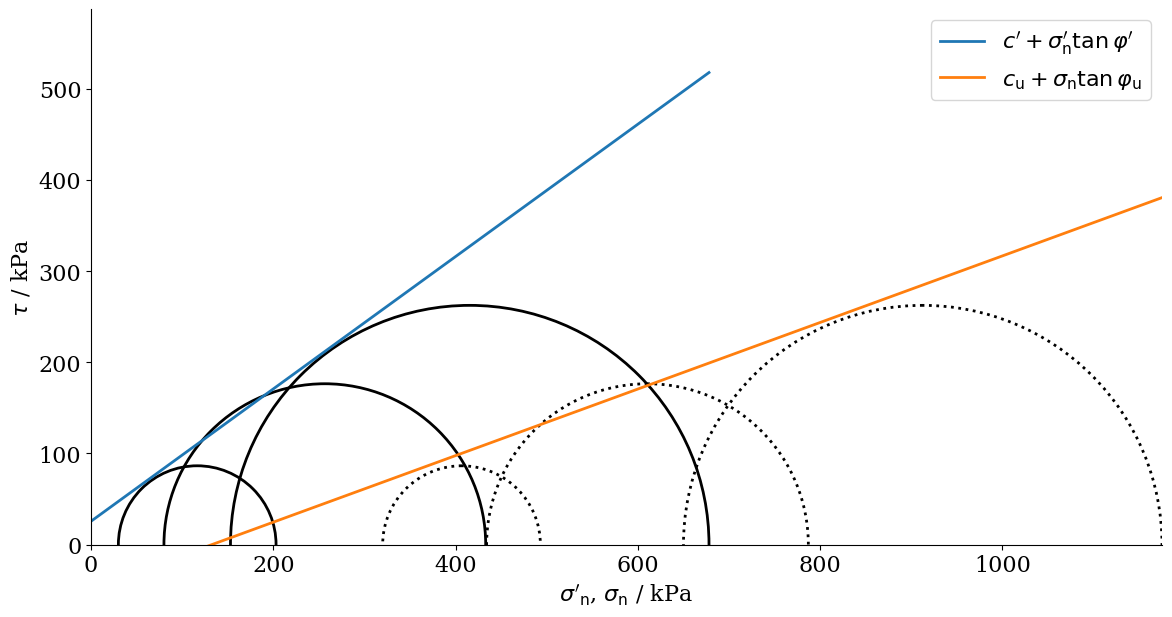

In [129]:
plot_circles_tangent_total(s_1fe,s_3fe,u_f)

In [130]:
tanalpha, b = find_b_tanalpha(s_1fe,s_3fe)
rw = np.arcsin(tanalpha)
print("Die (effektive) Kohäsion beträgt somit %.1f kPa" %(b/np.cos(rw)))
print("Der (effektive) Reibungswinkel beträgt somit %.1f °" %np.rad2deg(np.arcsin(tanalpha)))

tanalphau, bu = find_b_tanalpha(s_1fe+u_f,s_3fe+u_f)
rwu = np.arcsin(tanalpha)
print("\nDie undränierte Kohäsion beträgt somit %.1f kPa" %(bu/np.cos(rwu)))
print("Der undränierte Reibungswinkel beträgt somit %.1f °" %np.rad2deg(np.arcsin(tanalphau)))

Die (effektive) Kohäsion beträgt somit 25.6 kPa
Der (effektive) Reibungswinkel beträgt somit 36.0 °

Die undränierte Kohäsion beträgt somit -56.2 kPa
Der undränierte Reibungswinkel beträgt somit 20.1 °


## Varianten des Triaxialversuchs

Die Konsolidation kann auch anisotrop, d.h. unter Aufbau von Hauptspannungsdifferenzen bzw. Schubspannungen stattfinden.

Zudem können die folgenden Spannungspfade vorgegeben werden:

* Konstanter Manteldruck, Steigerung der Vertikallast: passive Stauchung (pS)
* Konstante Vertikallast, Reduktion des Manteldrucks: aktive Stauchung (aS)
* Konstanter Manteldruck, Verringerung der Vertikallast: aktive Dehnung (aD)
* Konstante Vertikallast, Steigerung des Manteldrucks: passive Dehnung (pD)

Zudem kann zwischen last- und weggesteuerten Versuchen unterschieden werden. 

Die folgende Abbildung zeigt die o.g. Spannungspfade bei isotroper Konsolidation:

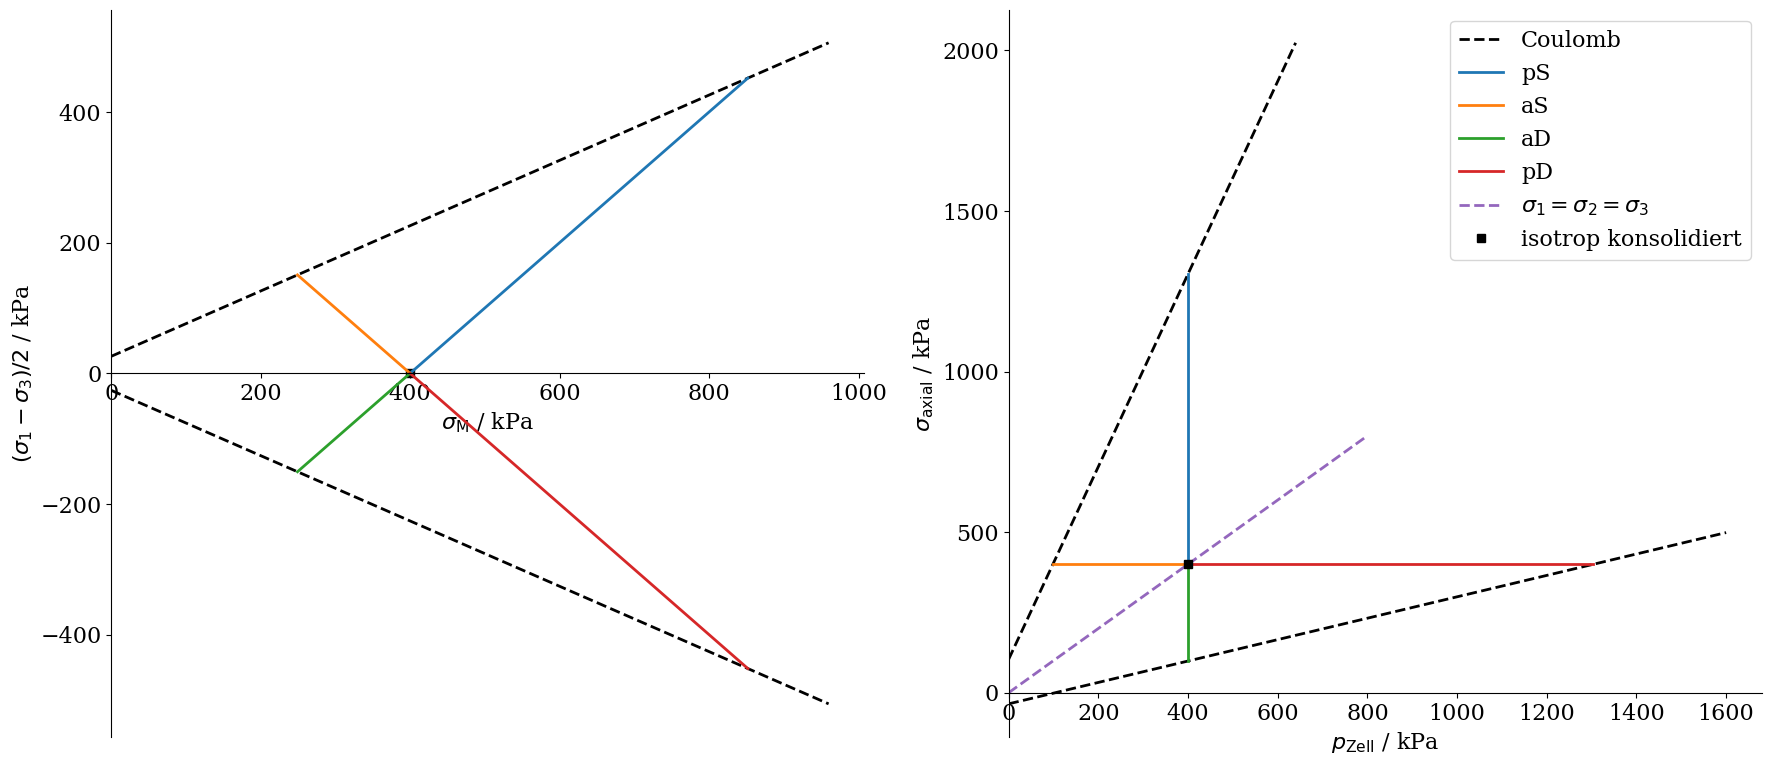

In [131]:
plot_variants()

## Vergleich zum Rahmenscherversuch

Während im Triaxialversuch die Hauptspannungen $\sigma_1$ und $\sigma_2=\sigma_3$ vorgegeben sind, sind diese im Rahmenscherversuch nicht bekannt. Versuche, theoretische Überlegungen sowie Simulationen basierend auf der Methode der diskreten Elemente (DEM) legen nahe, dass die Hauptspannungsorientierung zwischen zwei Grenzen liegt: Fall 1) ermittelt die Größe und Orientierung der Hauptspannungen aus der Annahme, dass der im Rahmenscherversuch ermittelte Spannungszustand die Bruchgerade aus dem Triaxialversuch tangiert, dass somit die Reibungswinkel aus beiden Versuchen gleich sind. Fall 2) nimmt an, dass sich spätestens im kritischen Zustand ein dem einfachen Scherversuch entsprechender um 45° gedrehter Spannungszustand mit der entsprechenden Scherfuge einstellt, und somit der aus dem Rahmenscherversuch ermittelte Reibungswinkel unter dem aus dem Triaxialversuch ermittelten Wert liegt. In Realität kommen weitere Zwängungen und Ungewissheiten hinzu, die das Bild verkomplizieren und letztlich auf die Aussage führen, dass die Versuchsart den Wert des Reibungswinkels beeinflusst.

### Fall 1

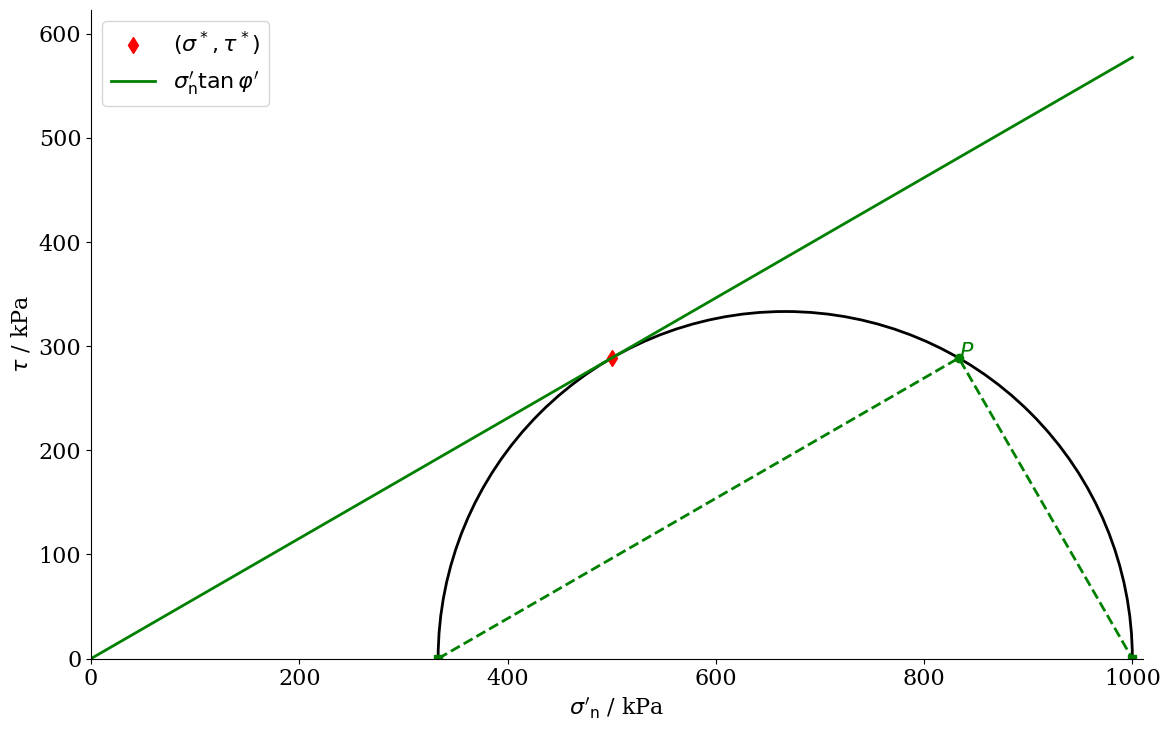

In [132]:
plot_circles_failure_1()

### Fall 2

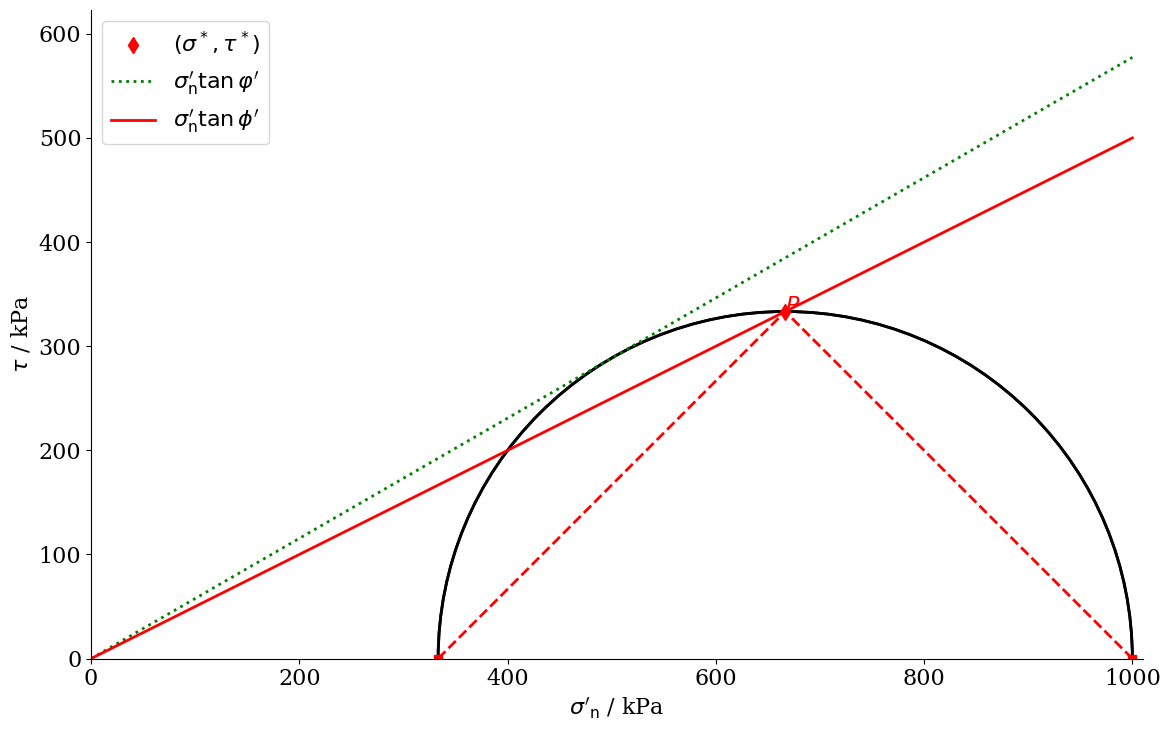

In [133]:
#%run plot_functions/Triaxial_plots.ipynb
plot_circles_failure_2()